# Importing Necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Explanatory Data Analysis and Feature Engineering

In [2]:
csv_url = '/Users/charithsaibanda/Downloads/complaints.csv'
df_csv = pd.read_csv(csv_url)

/var/folders/c6/3q9kb4d157j9y0l712wfjdl80000gn/T/ipykernel_12093/2830356677.py:2: DtypeWarning: Columns (5,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df_csv = pd.read_csv(csv_url)


In [4]:
json_url = '/Users/charithsaibanda/Downloads/complaints.json'
df_json = pd.read_json(json_url)

In [6]:
# Concatenate both CSV and JSON data
df = pd.concat([df_csv, df_json], ignore_index=True)

# Explore basic statistics
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9056534 entries, 0 to 9056533
Data columns (total 36 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   Date received                 object 
 1   Product                       object 
 2   Sub-product                   object 
 3   Issue                         object 
 4   Sub-issue                     object 
 5   Consumer complaint narrative  object 
 6   Company public response       object 
 7   Company                       object 
 8   State                         object 
 9   ZIP code                      object 
 10  Tags                          object 
 11  Consumer consent provided?    object 
 12  Submitted via                 object 
 13  Date sent to company          object 
 14  Company response to consumer  object 
 15  Timely response?              object 
 16  Consumer disputed?            object 
 17  Complaint ID                  float64
 18  date_received         

In [16]:

# Check for missing values
print(df.isnull().sum())


Consumer complaint narrative    0
category                        0
dtype: int64


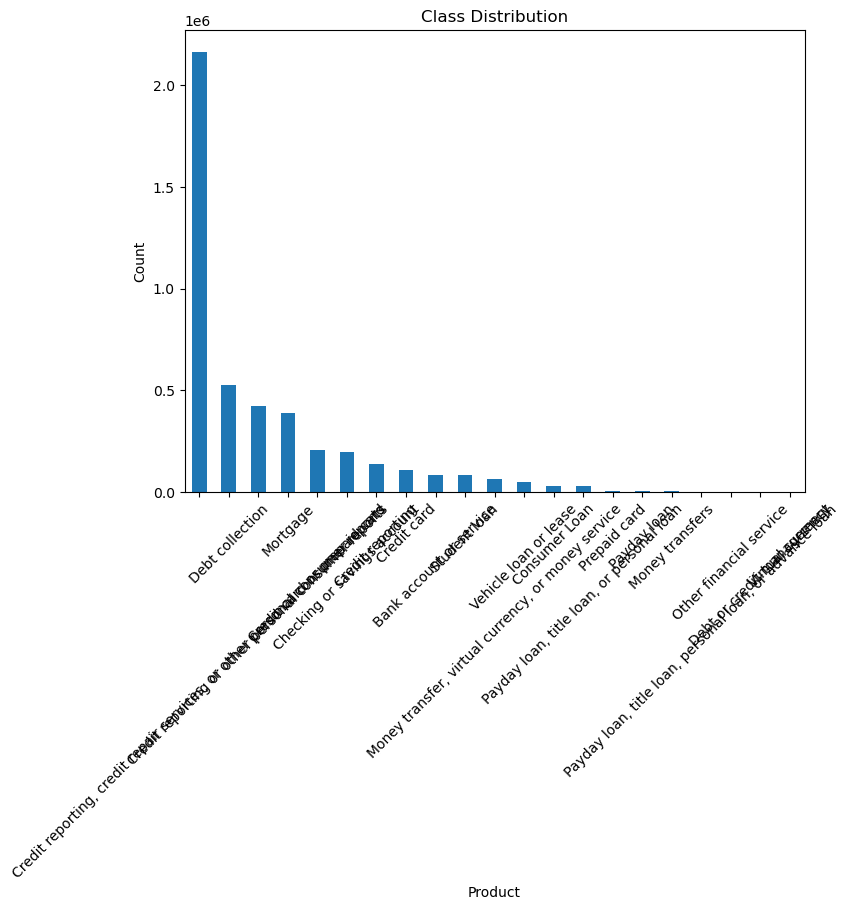

In [8]:
# Explore class distribution
plt.figure(figsize=(8, 6))
df['product'].value_counts().plot(kind='bar', rot=45)
plt.title('Class Distribution')
plt.xlabel('Product')
plt.ylabel('Count')
plt.show()

In [10]:
# Update category mapping
category_mapping = {
    'Credit reporting, repair, or other': 0,
    'Debt collection': 1,
    'Consumer Loan': 2,
    'Mortgage': 3
}

# Apply category mapping to the 'Product' column
df['category'] = df['Product'].map(category_mapping)

# Feature Engineering - Extract relevant features
df = df[['Consumer complaint narrative', 'category']].dropna()



# Step 2: Text Pre-Processing

In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df['Consumer complaint narrative'], df['category'], test_size=0.2, random_state=42
)

# Text processing using TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Step 3: Selection of Multi-Classification Model

In [12]:
# Train a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_tfidf, y_train)



RandomForestClassifier(random_state=42)

# Step 4: Comparison of Model Performance and Step 5: Model Evaluation

In [13]:
# Make predictions on the test set
y_pred = clf.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.96


In [14]:
# Display classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.96      0.98      0.97     45866
         2.0       0.91      0.17      0.28      1895
         3.0       0.95      0.97      0.96     22593

    accuracy                           0.96     70354
   macro avg       0.94      0.71      0.74     70354
weighted avg       0.95      0.96      0.95     70354



# Step 6: Prediction

In [15]:
new_complaints = ["I have an issue with my credit report."]
new_complaints_tfidf = vectorizer.transform(new_complaints)
prediction = clf.predict(new_complaints_tfidf)
decoded_prediction = {v: k for k, v in category_mapping.items()}
print(f"Predicted category: {decoded_prediction[prediction[0]]}")

Predicted category: Debt collection
